In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import sys
sys.path.append('/home3/sreich/MITgcm_c68w/MITgcm/utils/python/MITgcmutils')

from MITgcmutils import rdmds, llc


sys.path.append('/home3/sreich/jupyter/jupyter_notebooks')
from patchface3D import *

# Sensitivities

In [58]:
nx = 270
nz = 50

#run_dir='/nobackup/sreich/llc270_c68w_runs/run_sens_pk0000841536_ke_42days/'
run_dir='/nobackup/sreich/llc270_c68w_runs/run_sens_pk0000841536_T_2/'

# adxx_uvel = rdmds(run_dir+'ctrl_variables/adxx_uvel.0000000000')
# adxx_vvel = rdmds(run_dir+'ctrl_variables/adxx_vvel.0000000000')
adxx_atemp = rdmds(run_dir+'ctrl_variables/adxx_atemp.0000000000')
#adxx_theta = rdmds(run_dir+'ctrl_variables/adxx_theta.0000000000')
adxx_theta = rdmds('/nobackup/owang/runs/MG/llc90/run.v4_rls4.077d3.iter0/adxx_theta.0000000000')

np.unique(adxx_theta) #nz, ny, nx

array([-533.51928711, -529.47247314, -526.12158203, ..., 1338.30383301,
       1376.66442871, 1380.8927002 ])

In [48]:
def fix_uv(u_in_wrl, v_in_wrl, nx):

    # need to fix cap face?
    
    u_out = np.zeros((4*nx, 4*nx))
    u_out[:,:2*nx] = u_in_wrl[:,:2*nx]
    u_out[:,2*nx:] = v_in_wrl[:,2*nx:]
    
    v_out = np.zeros((4*nx, 4*nx))
    v_out[:,:2*nx] = v_in_wrl[:,:2*nx]
    v_out[:,2*nx:] = -u_in_wrl[:,2*nx:]

    return u_out, v_out



50
(90, 270, 50)


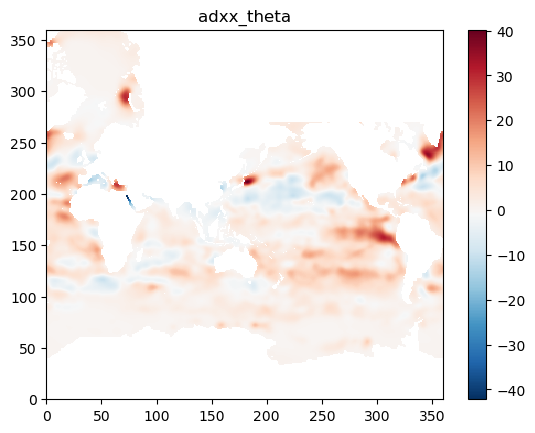

In [59]:
adxx_theta_wrl = patchface3D(adxx_theta, 90, nz)[0,:,:]
adxx_theta_wrl[adxx_theta_wrl == 0] = np.nan

plt.pcolormesh(adxx_theta_wrl, cmap='RdBu_r')
plt.colorbar()
#plt.xlim(500,575)
#plt.ylim(450,550)
plt.title('adxx_theta')
plt.show()



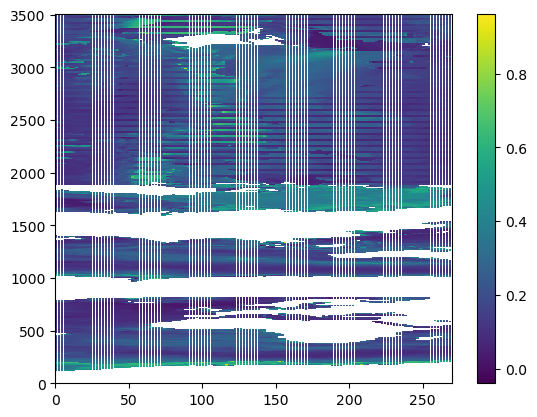

In [45]:
adxx_2d = adxx_theta[0,:,:]
adxx_2d[adxx_2d == 0] = np.nan
plt.pcolor(adxx_2d)
plt.colorbar()

In [34]:
tmp = adxx_theta_wrl[540:550, 520:530]
tmp

array([[0.12541023,        nan, 0.12105673,        nan, 0.11858789,
               nan, 0.10769066,        nan, 0.10915603,        nan],
       [0.12505309,        nan, 0.12053376,        nan, 0.11298018,
               nan, 0.1077672 ,        nan, 0.11178255,        nan],
       [0.12217193,        nan, 0.12167734,        nan, 0.10930029,
               nan, 0.09643865,        nan, 0.11198466,        nan],
       [0.11901771,        nan, 0.12154941,        nan, 0.11267876,
               nan, 0.10397903,        nan, 0.106249  ,        nan],
       [0.11453889,        nan, 0.11719777,        nan, 0.10773201,
               nan, 0.10630744,        nan, 0.10507543,        nan],
       [0.10883922,        nan, 0.104307  ,        nan, 0.10445281,
               nan, 0.10573076,        nan, 0.10656286,        nan],
       [0.11016165,        nan, 0.10077616,        nan, 0.10134683,
               nan, 0.10402694,        nan, 0.10942728,        nan],
       [0.11228337,        nan, 0.0979341

In [35]:
adj_theta_wrl[540:550, 520:530]

array([[0.17204647, 0.16844964, 0.16606005, 0.1621906 , 0.16267763,
        0.1626451 , 0.14772594, 0.1470504 , 0.14972131, 0.15186925],
       [0.17155643, 0.16807853, 0.1653477 , 0.1632774 , 0.15499054,
        0.14383553, 0.14783584, 0.15928166, 0.15333164, 0.1643012 ],
       [0.16760442, 0.16818386, 0.16692474, 0.16164859, 0.14994375,
        0.14883423, 0.13229471, 0.14823425, 0.15361466, 0.16195405],
       [0.16328694, 0.16696334, 0.16675459, 0.15891276, 0.15457827,
        0.14406271, 0.14263904, 0.14328468, 0.14575318, 0.14864795],
       [0.15715078, 0.15532297, 0.16078512, 0.14936355, 0.14778762,
        0.14798185, 0.1458295 , 0.14271136, 0.14414494, 0.14523037],
       [0.14933807, 0.14181748, 0.14309871, 0.14265901, 0.1432882 ,
        0.14476514, 0.14503643, 0.14406194, 0.14618368, 0.14730784],
       [0.15115474, 0.13508846, 0.13825056, 0.13856949, 0.13902962,
        0.14040118, 0.14269669, 0.14405589, 0.15010011, 0.14874598],
       [0.15406547, 0.13475659, 0.1343495

50
(270, 810, 50)


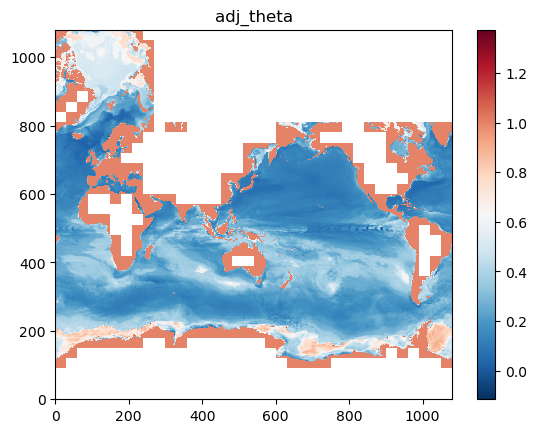

In [14]:
adj_theta = rdmds(run_dir+'ADJtheta.0000000000')

adj_theta_wrl = patchface3D(adj_theta, nx, nz)[0,:,:]
adj_theta_wrl[adj_theta_wrl == 0] = np.nan

plt.pcolormesh(adj_theta_wrl, cmap='RdBu_r')
plt.colorbar()
plt.title('adj_theta')
plt.show()



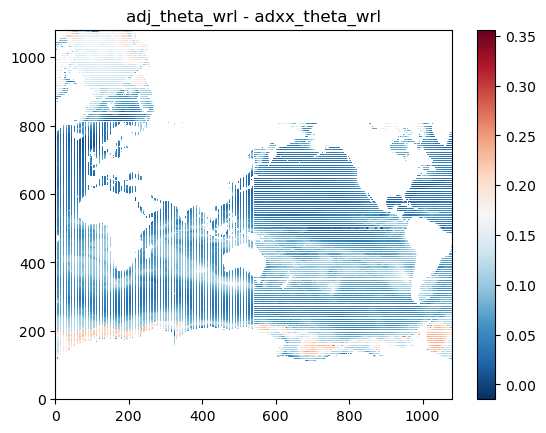

In [15]:
plt.pcolormesh(adj_theta_wrl - adxx_theta_wrl, cmap='RdBu_r')#, vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('adj_theta_wrl - adxx_theta_wrl')
plt.show()


# U,V

50
(270, 810, 50)


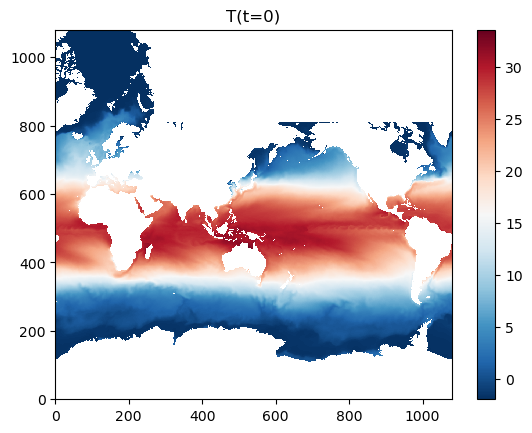

In [10]:
t = rdmds(run_dir+'T.0000000000')

t = patchface3D(t, 270, 50)[0,:,:]
t[t == 0] = np.nan




plt.pcolormesh(t, cmap='RdBu_r')
plt.colorbar()
plt.title('T(t=0)')
plt.show()


In [40]:
# adxxu_out, adxxv_out = fix_uv(adxx_uvel_wrl, adxx_vvel_wrl, 270)

# plt.pcolor(adxxu_out, cmap='RdBu_r', vmin=-1, vmax=1)
# plt.colorbar()
# plt.title('u_out')
# plt.show()

# plt.pcolor(adxxv_out, cmap='RdBu_r', vmin=-1, vmax=1)
# plt.colorbar()
# plt.title('v_out')
# plt.show()

## Compare to U, V ICs

In [82]:
def read_float32(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f'))
        print(np.shape(data))
    return data



(47385000,)
(47385000,)
50
(270, 810, 50)
50
(270, 810, 50)


Text(0.5, 1.0, 'u')

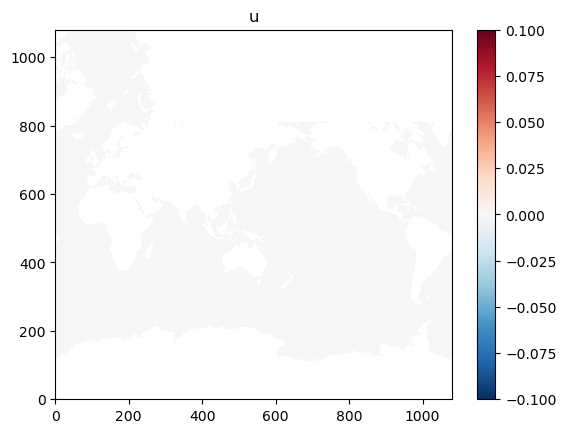

In [88]:
u = read_float32(run_dir + 'U.data')
u = u.reshape(50, 270*13, 270)

v = read_float32(run_dir + 'V.data')
v = u.reshape(50, 270*13, 270)

u_wrl = patchface3D(u, 270, 50)[0,:,:]
u_wrl[u_wrl == 0] = np.nan

v_wrl = patchface3D(v, 270, 50)[0,:,:]
v_wrl[v_wrl == 0] = np.nan

u_wrl, v_wrl = fix_uv(u_wrl, v_wrl, 270)

plt.pcolormesh(u_out-u0, cmap='RdBu_r')#, vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('u')

## Patchface3D for u, v

(47385000,)
(47385000,)
50
(270, 810, 50)
50
(270, 810, 50)


Text(0.5, 1.0, 'v_out')

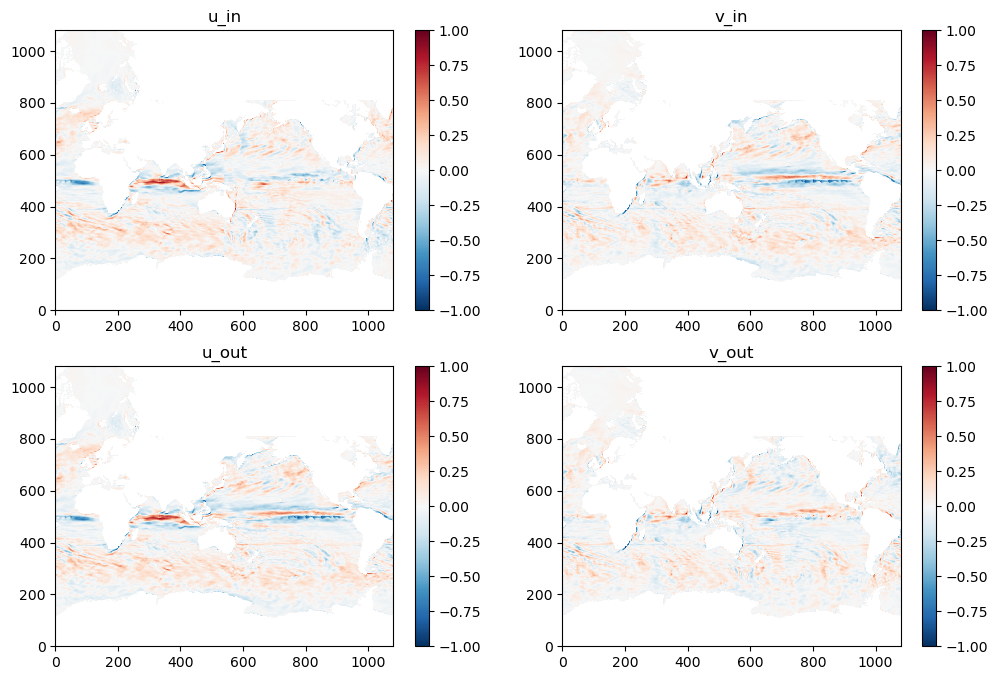

In [59]:
# read in ICs

u_in = read_float32(run_dir + 'U.data')
u_in = u_in.reshape(50, 270*13, 270)


v_in = read_float32(run_dir + 'V.data')
v_in = v_in.reshape(50, 270*13, 270)


# fix orientation

nx = 270

u_out = np.zeros((4*nx, 4*nx))
u_out[:,:2*nx] = u_in_wrl[:,:2*nx]
u_out[:,2*nx:] = v_in_wrl[:,2*nx:]

v_out = np.zeros((4*nx, 4*nx))
v_out[:,:2*nx] = v_in_wrl[:,:2*nx]
v_out[:,2*nx:] = -u_in_wrl[:,2*nx:]



fig, axes = plt.subplots(2, 2, figsize=(12, 8))

u_in_wrl = patchface3D(u_in, 270, 50)[0,:,:]
u_in_wrl[u_in_wrl == 0] = np.nan
im1 = axes[0, 0].pcolormesh(u_in_wrl, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im1, ax=axes[0, 0])
axes[0, 0].set_title('u_in')


v_in_wrl = patchface3D(v_in, 270, 50)[0,:,:]
v_in_wrl[v_in_wrl == 0] = np.nan
im2 = axes[0, 1].pcolormesh(v_in_wrl, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im2, ax=axes[0, 1])
axes[0, 1].set_title('v_in')


im3 = axes[1, 0].pcolormesh(u_out, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im3, ax=axes[1, 0])
axes[1, 0].set_title('u_out')

im4 = axes[1, 1].pcolormesh(v_out, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im4, ax=axes[1, 1])
axes[1, 1].set_title('v_out')
